In [ ]:
!pip install transformers datasets evaluate -q
!pip install jiwer -q
#!pip uninstall pyarrow
!pip install pyarrow
!pip install transformers[torch]
#y!pip uninstall accelerate
!pip install accelerate -U

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [38]:
from datasets import load_dataset, DatasetDict

ds = load_dataset("TheFusion21/PokemonCards")
ds = ds["train"].train_test_split(test_size=0.1)
train_ds = ds["train"]
test_ds = ds["test"]



In [ ]:
print(train_ds[0])

{'id': 'hgss1-10', 'image_url': 'https://images.pokemontcg.io/hgss1/10_hires.png', 'caption': 'A Stage 1 Pokemon Card of type Lightning with the title Raichu and 90 HP of rarity Rare Holo evolved from Pikachu from the set HeartGold & SoulSilver and the flavor text: If the electric pouches in its cheeks become fully charged, both ears will stand straight up. It has the attack Iron Tail with the cost Colorless, the energy cost 1 and the damage of 30 with the description: Flip a coin until you get tails. This attack does 30 damage times the number of heads. It has the attack Thunderbolt with the cost Lightning, Lightning, the energy cost 2 and the damage of 100 with the description: Discard all Energy attached to Raichu. It has weakness against Fighting 2. It has resistance against Metal -20. ', 'name': 'Raichu', 'hp': 90, 'set_name': 'HeartGold & SoulSilver'}


In [ ]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from imageio import imread

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()

a = imread(f)
plt.imshow(a)
#plt.show()


def plot_images(images, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)

        req = urllib.request.Request(images[i], headers={'User-Agent': 'Chrome/47.0.2526.106'})
        f = urllib.request.urlopen(req).read()

        a = imread(f)
        plt.imshow(a)

        plt.axis("off")


sample_images_to_visualize = [np.array(train_ds[i]["image_url"]) for i in range(5)]
sample_captions = [train_ds[i]["caption"] for i in range(5)]
plot_images(sample_images_to_visualize, sample_captions)


In [5]:
from transformers import AutoProcessor

checkpoint = "microsoft/git-base"
processor = AutoProcessor.from_pretrained(checkpoint)


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import sys
import urllib.request
import numpy as np

req = urllib.request.Request(train_ds[0]["image_url"], headers={'User-Agent': 'Chrome/47.0.2526.106'})
f = urllib.request.urlopen(req).read()
print(type(f))
sys.stdout.write(f)

open('/filename.png', 'wb').write(f)



In [7]:
import sys
from PIL import Image

#reqimages = []
#reqDict = dict()
#for x in train_ds["image_url"]:
    #req = urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'})
    #f = urllib.request.urlopen(req).read()
    #reqDict[f] = x
    #try:
        #Image.open(f).getdata()
        #reqimages.append(f)
        #print(type(f))
        #print( sys.getsizeof(f))
    #except Exception as e:
        #continue
#print(len(reqimages))
rgb_values = np.concatenate([Image.open("/filename.png").getdata()], axis=0) / 255

# rgb_values.shape == (n, 3),
# where n is the total number of pixels in all images,
# and 3 are the 3 channels: R, G, B.

# Each value is in the interval [0; 1]

mu_rgb = np.mean(rgb_values, axis=0)  # mu_rgb.shape == (3,)
std_rgb = np.std(rgb_values, axis=0)  # std_rgb.shape == (3,)

print(mu_rgb)
print(std_rgb)

[0.70755767 0.60712374 0.47591472]
[0.23942258 0.18875135 0.23382149]


In [27]:
from PIL import Image
#import numpy as np

def transforms(example_batch):

    #imgpath = []
    #for x in example_batch["image_url"]:
     # img =Image.open(urllib.request.Request(x, headers={'User-Agent': 'Chrome/47.0.2526.106'}))
     # imgpath.append(img)
    #print(type(example_batch))

    #plt.imshow(reqimages[0])

    #images = [x for x in reqimages]
    #print(type(images))
    #captions = [x for x in example_batch["caption"]]
    #inputs = processor(images=images, text=captions, padding="max_length")
    imgProcessor = processor.image_processor
    txtTokenizer = processor.tokenizer
    txtTokenizer.padding_side = "left"
    txtTokenizer.truncation_side = "left"

    #imgProcessor.do_normalize(True)
    # rgb_values.shape == (n, 3),
    # where n is the total number of pixels in all images,
    # and 3 are the 3 channels: R, G, B.

    # Each value is in the interval [0; 1]

    images = [Image.open("/filename.png")]
    captions = ["A Stage 1 Pokemon Card of type Lightning with the title Raichu and 90 HP of rarity Rare Holo evolved from Pikachu from the set HeartGold & SoulSilver and the flavor text: If the electric pouches in its cheeks become fully charged, both ears will stand straight up. It has the attack Iron Tail with the cost Colorless, the energy cost 1 and the damage of 30 with the description: Flip a coin until you get tails. This attack does 30 damage times the number of heads. It has the attack Thunderbolt with the cost Lightning, Lightning, the energy cost 2 and the damage of 100 with the description: Discard all Energy attached to Raichu. It has weakness against Fighting 2. It has resistance against Metal -20. "]
    imgProcessor.preprocess(images=images,image_mean=mu_rgb[:3], image_std=std_rgb[:3])

    inputs = processor(images=images, text=captions, return_tensors="pt")
    inputs.update({"labels": inputs["input_ids"]})
    #print(inputs.pop("labels"))
    return inputs


train_ds.set_transform(transforms)
test_ds.set_transform(transforms)

In [39]:
print(train_ds.shape)
print(test_ds.shape)
print(test_ds[0])

(11825, 6)
(1314, 6)
{'id': 'ecard1-9', 'image_url': 'https://images.pokemontcg.io/ecard1/9_hires.png', 'caption': "A Stage 2 Pokemon Card of type Colorless with the title Dragonite and 100 HP of rarity Rare Holo evolved from Dragonair from the set Expedition Base Set.  It has the attack Dragon Tail with the cost Lightning, Water, Fighting, the energy cost 3 and the damage of 40 with the description: Flip 2 coins. This attack does 40 damage times the number of heads. It has the ability Tailwind with the description: Once during your turn (before your attack), if Dragonite is on your Bench, you may reduce your Active Pokemon's Retreat Cost to 0. ", 'name': 'Dragonite', 'hp': 100, 'set_name': 'Expedition Base Set'}


In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model = AutoModelForCausalLM.from_pretrained(checkpoint)
# Load the tokenizer associated with the model
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Tokenize the input text
inputs = tokenizer("Hello, world!", return_tensors="pt")

# Get the input IDs
input_ids = inputs["input_ids"]

# Forward pass
#model.forward(input_ids=input_ids, pixel_values=torch.randn(1, 3, 224, 224))


#model_config = model.config
#model_config.
#print(model.config)


config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [22]:
from evaluate import load
import torch

wer = load("wer")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predicted = logits.argmax(-1)
    decoded_labels = processor.batch_decode(labels, skip_special_tokens=True)
    decoded_predictions = processor.batch_decode(predicted, skip_special_tokens=True)
    wer_score = wer.compute(predictions=decoded_predictions, references=decoded_labels)
    return {"wer_score": wer_score}

In [32]:
#!pip uninstall transformers[torch]

from transformers import TrainingArguments, Trainer

model_name = checkpoint.split("/")[1]

training_args = TrainingArguments(
    output_dir=f"{model_name}-pokemon",
    learning_rate=5e-5,
    num_train_epochs=2,
    fp16=True,
    per_device_train_batch_size=50,
    per_device_eval_batch_size=50,
    gradient_accumulation_steps=1,
    save_total_limit=3,
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True
)


In [24]:
from torch.nn import CrossEntropyLoss

def compute_loss(self, model, inputs, return_outputs=False):
    labels = inputs.pop("labels")  # Remove labels from inputs as they are not model inputs
    outputs = model(**inputs)  # Forward pass
    logits = outputs.logits
    loss_fct = CrossEntropyLoss()
    loss = loss_fct(logits.view(-1, logits.size(-1)), labels.view(-1))
    return (loss, outputs) if return_outputs else loss

In [33]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

In [34]:
trainer.train()

Step,Training Loss,Validation Loss,Wer Score
100,0.000000,0.000001,1.511450
200,0.000000,0.000000,1.511450


Step,Training Loss,Validation Loss,Wer Score
100,0.000000,0.000001,1.511450
200,0.000000,0.000000,1.511450
300,0.000000,0.000000,1.511450
400,0.000000,0.000000,1.511450


TrainOutput(global_step=474, training_loss=0.00011148902023537035, metrics={'train_runtime': 3746.8397, 'train_samples_per_second': 6.312, 'train_steps_per_second': 0.127, 'total_flos': 67543603459488.0, 'train_loss': 0.00011148902023537035, 'epoch': 2.0})

In [35]:
trainer.push_to_hub()

HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-66782d27-48e743a0729206b5146fef15;9351aedf-1351-4afa-b48a-4eb5dc57ea10)

Invalid username or password.

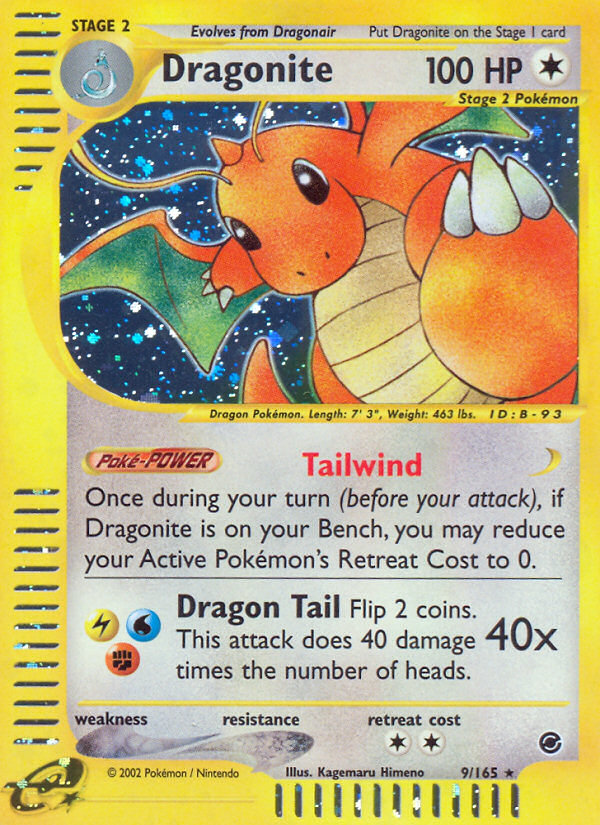

In [40]:
from PIL import Image
import requests

#print (test_ds[0])
url = 'https://images.pokemontcg.io/ecard1/9_hires.png'
image = Image.open(requests.get(url, stream=True).raw)
image

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

In [42]:
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a stage 1 pokemon card of type lightning with the title raichu and 90 hp of rarity rare holo evolved from pikachu from the set heartgold & soulsilver and the flavor text : if the electric pouches in its cheeks
